#Test 2

In [4]:
#https://www.khanacademy.org/computer-programming/spin-off-of-challenge-modeling-accretion-disks/4537389226213376

In [5]:
pip install einsteinpy

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
startWithRotation = True
initialSpin = 1.8

SphereConst = 4/3*np.pi
GRAVITATIONAL_CONSTANT = 0.8

collisionThreshold = 1.5
sunThreshold = 500

In [8]:
class Particle():
    def __init__(self,pos,v,m,rho):
        self.corr_m = .15
        self.corr_rad = .15

        self.position = pos
        self.vel = v #np.array(3)
        self.mass = m*self.corr_m
        self.densitiy = rho
        self.radius = self.corr_m*SphereConst*rho*m**(1/3) # Corr
        self.angular_mom = (2/5)*self.mass*self.radius*self.vel

        self.SelfGpotentialE = -(3/5)*GRAVITATIONAL_CONSTANT*self.mass**2/self.radius
        self.KineticE = 0.5*self.mass*np.sum((self.vel**2))

        self.combineWith=False

    def unit_vec(array):
        array = array/np.sqrt(np.sum(array[:]**2))

    def __del__(self):
        #print("Body removed")
        None

    def move(self):
        self.position += self.vel
    
    def attract(self, other):
        d = np.sqrt(np.sum((self.position - other.position)**2))

        if d<=((self.radius + other.radius)*collisionThreshold):
            self.merge(other)
            #print("Mergre success")
            return 1

        else:
            force = GRAVITATIONAL_CONSTANT*self.mass*other.mass/d**2
            accel1 = force / self.mass
            accel2 = force / other.mass

            ds_hat = (self.position - other.position)/d
            self.vel -= accel1 * ds_hat
            other.vel -= accel2 * ds_hat
            #print("Attraction success")
            return 0

    def merge(self, other):
        #print("Merging bodies....")
        self.mass = (self.mass + other.mass)*self.corr_m
        self.position = (self.mass*self.position+other.mass*other.position)/(self.mass+other.mass)
        self.vel = self.mass*self.vel + other.mass*other.vel/(self.mass+other.mass)
        self.angular_mom = (self.angular_mom + other.angular_mom)
        self.radius = (self.radius + other.radius)*self.corr_rad#*(1e-6*self.angular_mom)
        self.density = self.mass/(SphereConst*self.radius**(1/3))

In [24]:
class space():
    def __init__(self, n, iter):
        self.n = n
        v, pos = np.random.random((self.n,3)),np.random.random((self.n,3)),
        m, rho = np.random.random(self.n),np.random.random(self.n)
        self.particle=[]

        for i in range((self.n)):
            self.particle.append(Particle(pos[i],v[i],m[i],rho[i]))
            if startWithRotation:
                self.particle[i].vel[1] += initialSpin*np.random.random(1)
                self.particle[i].vel[2] += initialSpin*np.random.random(1)

        print("Particles initialized: ",str(self.n)," particles",str(iter)," iterations")
        self.plot()
        self.start(iter)

    def start(self,iter):
        for l in range(iter):
            print("\n\nIter: ",l+1)
            self.update()            
            for mov in range(self.n):
                self.particle[mov].move()
            if l%50 == 0:
                self.plot()
        self.plot()                


    def update(self):
        j = 0
        removed = np.zeros(0,dtype = 'int32')
        for i in range(self.n):
            while j < self.n and j != i:
                if(self.particle[i].attract(self.particle[j])):
                    removed = np.append(removed, j+1)
                j += 1

        for i in removed:
            #print("Removing body....")
            for k in range(i, self.n):
                self.particle[k-1] = self.particle[k]
                self.n -= 1
            del self.particle[-1]
            #print("Body removed")
            #if i%1000:
            #    print("Particles left: ", len(self.particle))
            self.n = len(self.particle)
        print("Particles left: ", self.n)

    def plot(self):
        x, y, z, m,rad,densitiy,angular_mom,vel = [],[],[],[],[],[],[],[]
        for i in range(self.n):
            x.append(self.particle[i].position[0])
            y.append(self.particle[i].position[1])
            z.append(self.particle[i].position[2])
            m.append(np.log10(self.particle[i].mass))
            rad.append(np.log10(self.particle[i].radius))
            densitiy.append(np.log10(self.particle[i].densitiy))
            angular_mom.append(np.log10(self.particle[i].angular_mom))
            vel.append(np.log10(self.particle[i].vel))

        ax = plt.axes(projection='3d')
        ax.scatter(np.array(x), np.array(y), np.array(z), cmap='viridis', linewidth=0.9)
        plt.title('pos')
        plt.show()

        ax = plt.axes(projection='3d')
        ax.scatter(np.array(m), np.array(rad), np.array(densitiy), cmap='viridis', linewidth=0.9)
        plt.title('report m vs rad. vs density')
        plt.xlabel('log10 Solar Mass')
        plt.ylabel('log10 Solar Radius')
        plt.show()

        plt.hist(np.array(vel))
        plt.title('Velocity')
        plt.show()

        plt.hist(np.array(angular_mom))
        plt.title('Angular Momentum')
        plt.show()

Particles initialized:  500  particles 20  iterations


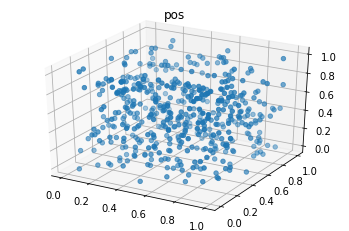

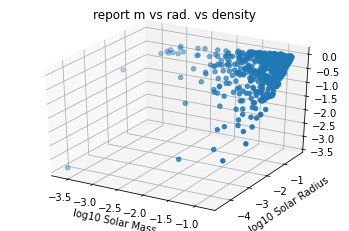

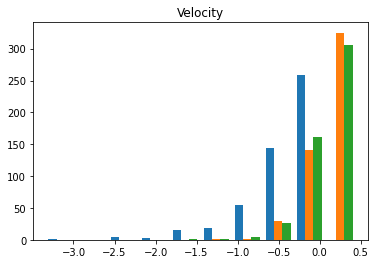

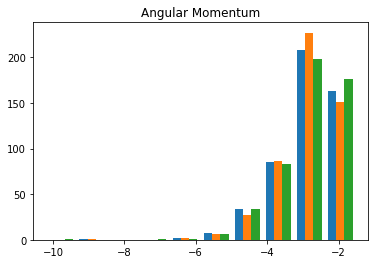



Iter:  1
Particles left:  311


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log10


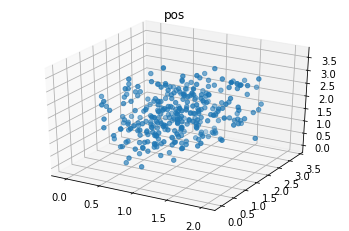

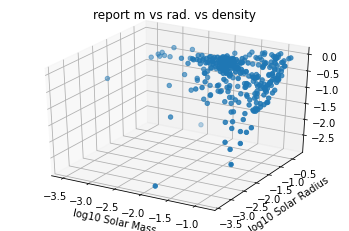

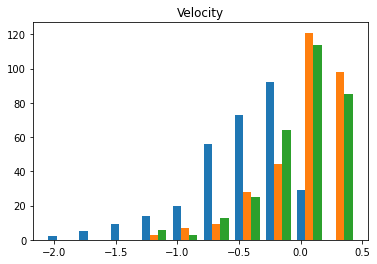

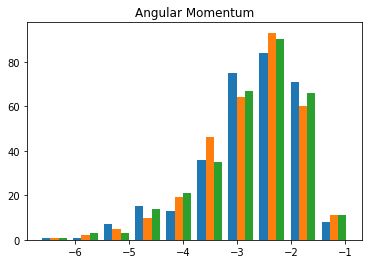



Iter:  2
Particles left:  283


Iter:  3
Particles left:  266


Iter:  4
Particles left:  256


Iter:  5
Particles left:  246


Iter:  6
Particles left:  237


Iter:  7
Particles left:  229


Iter:  8
Particles left:  223


Iter:  9
Particles left:  221


Iter:  10
Particles left:  221


Iter:  11
Particles left:  220


Iter:  12
Particles left:  220


Iter:  13
Particles left:  220


Iter:  14
Particles left:  220


Iter:  15
Particles left:  219


Iter:  16
Particles left:  219


Iter:  17
Particles left:  219


Iter:  18
Particles left:  219


Iter:  19
Particles left:  219


Iter:  20
Particles left:  219


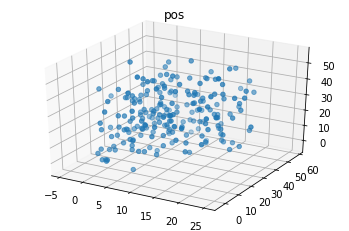

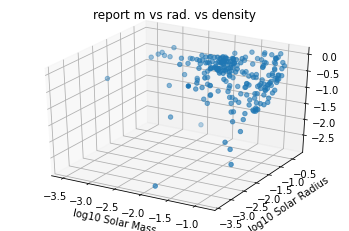

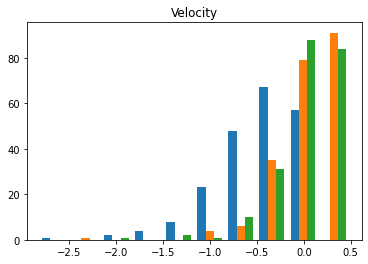

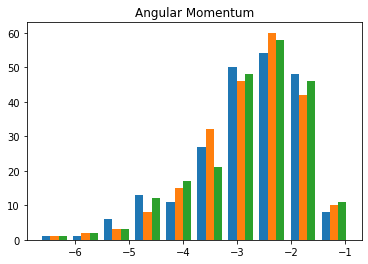

In [26]:
a = space(500,20)